# CSC475/575 Spring 2024 - Assignment 6

This assignment covers topics related to dynamic time warping, cross-similarity, and self-similarity matrices. 

* A4.1: Cross-similarity matrix    
* A4.2: Self-similarity matrix   
* A4.3: Cross-similarity and time-stretching   
* A4.4: Harmonic/percussive and self-similarity matrix    
* A4.5: Dynamic time warping to estimate time stretching 

Each question is worth 2 points for a total of 10 points for the assignment. 


In [48]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import IPython.display as ipd

#### **Question A6.1 (basic):** 

Consider the recording disco.0000.wav from the GTZAN collection - also attached to the assignment description. 
Repeat the 30 second recording to create a one minute recording. Plot the cross-similarity matrix (https://librosa.org/doc/latest/generated/librosa.segment.cross_similarity.html) for this new one minute long clip with the original 30 second recording. Describe how the repetition can be visually observed in the plot of the cross-similarity matrix. Use MFCC features and the affinity mode

 (**Basic: 2 points**)

In [4]:
# your code goes here 
disco_fname = './disco.00000.wav'
disco30, srate = librosa.load(disco_fname)
print(disco30.shape)
mfcc_matrix_disco30 = librosa.feature.mfcc(y=disco30, sr=srate)
print(mfcc_matrix_disco30.shape)

disco60 = np.append(disco30, disco30)
print(disco60.shape)
mfcc_matrix_disco60 = librosa.feature.mfcc(y=disco60, sr=srate)
print(mfcc_matrix_disco60.shape)


(664180,)
(20, 1298)
(1328360,)
(20, 2595)


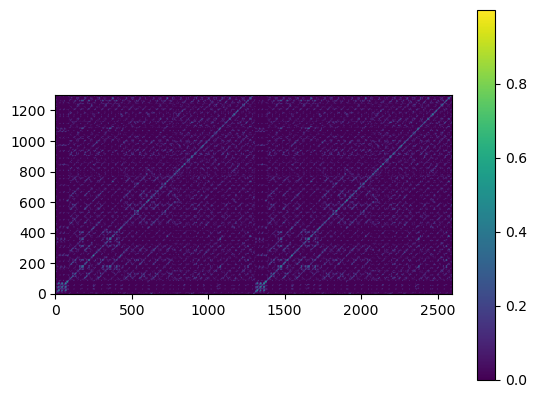

In [24]:
cross_sim = librosa.segment.cross_similarity(mfcc_matrix_disco60, mfcc_matrix_disco30, mode='affinity')
cross_sim.shape

cmap = 'viridis'
plt.imshow(cross_sim, cmap=cmap, origin='lower')
plt.colorbar()
plt.show()

With the y axis representing the 30 second clip, and the x axis representing the 60 second doubling of it, you can see the distinct relationship between the two identical clips repeat at the moment that the first 30 second clip ends and the second identical one begins (around 1300).

#### **Question A6.2 (basic):** 

Plot the self-similarity matrix for your original 30 second clip (i.e the cross-similarity to itself). Visually identify a repeating structure (it could be a bar, a phrase, a segment) on the self-similarity matrix, describe it, and generate two audio fragments that demonstrate this repetition. Hint: repetition shows as block structure, you will need to map the dimensions of the repeating block to time to select the audio fragments. The time span of the one repetition can be found on the horizontal axis and the time span of the second repetition can be found on the vertical axis. 

(**Basic: 2 points**)

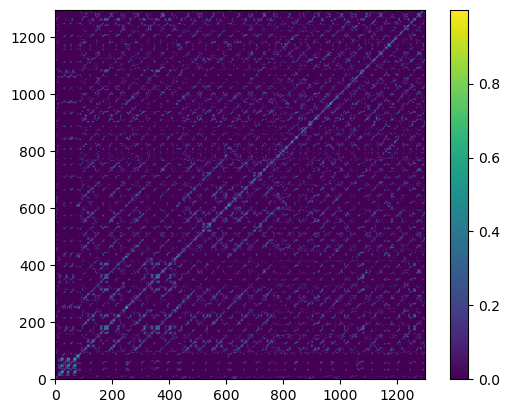

In [22]:
# your code goes here 
self_sim = librosa.segment.cross_similarity(mfcc_matrix_disco30, mfcc_matrix_disco30, mode='affinity')
self_sim.shape

cmap = 'viridis'
plt.imshow(self_sim, cmap=cmap, origin='lower')
plt.colorbar()
plt.show()


One distinct repetition can be found from around (250, 100) to (450, 300), first I'll map the x axis from frames back to samples, Our audio file has 664,180 samples, and our MFCC has 1298 frames, meaning frame sizes are 512 samples long. So to go from frame 100 to frame 300 is to go from sample 51,200 to sample 153,600, and to go from frame 250 to 450 is samples 128,000 to 230,400. Since these overlap I'll cut them off at the midpoint. 
  
In the audio clips below you can see that the correlation is due to a repeating phrase in the song, characterized by 2 chords slowly played one after the other on the keys, then a couple slaps on the bass, then those chords on the keys repeat. The slap is at the end of the first clip and the start of the second, but since the majority of the frames are the chords on the keys, the correlation is still captured.

In [52]:
disco_early = disco30[51200:140800]
disco_later = disco30[140800:230400]

ipd.Audio(disco_early, rate=srate)

In [51]:
ipd.Audio(disco_later, rate=srate)

**Question A6.3 (expected):** 

Use [time stretching](https://librosa.org/doc/latest/generated/librosa.effects.time_stretch.html) on your audio recording to create the following modified signal: the first 10 seconds should be slowed down (rate 0.75), the middle 10 seconds should remain the same, and the last 10 seconds should be sped up (rate 1.25). Plot the cross-similarity matrix between the original and modified recording (use MFCC features and the affinity mode) and describe how the time-stretching can be observed visually.


**(Expected: 2 points)** 

In [18]:
# your code goes here
disco_first = librosa.effects.time_stretch(disco30[:10*srate], rate=0.75)
print(disco_first.shape)

disco_second = disco30[10*srate:20*srate]
print(disco_second.shape)

disco_third = librosa.effects.time_stretch(disco30[20*srate:30*srate], rate=1.25)
print(disco_third.shape)


(294000,)
(220500,)
(176400,)


In [21]:
mfcc_matrix_disco_first = librosa.feature.mfcc(y=disco_first, sr=srate)
print(mfcc_matrix_disco_first.shape)

mfcc_matrix_disco_second = librosa.feature.mfcc(y=disco_second, sr=srate)
print(mfcc_matrix_disco_second.shape)

mfcc_matrix_disco_third = librosa.feature.mfcc(y=disco_third, sr=srate)
print(mfcc_matrix_disco_third.shape)

(20, 575)
(20, 431)
(20, 345)


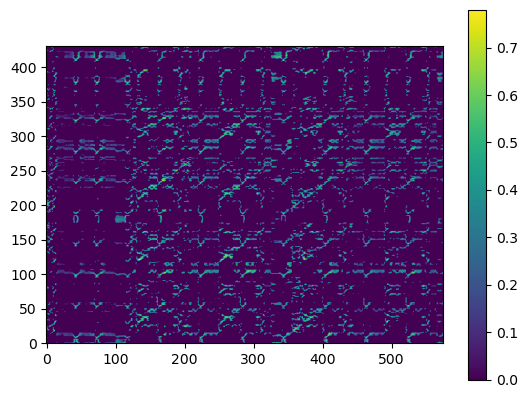

In [22]:
cross_sim = librosa.segment.cross_similarity(mfcc_matrix_disco_first, mfcc_matrix_disco_second, mode='affinity')
cross_sim.shape

cmap = 'viridis'
plt.imshow(cross_sim, cmap=cmap, origin='lower')
plt.colorbar()
plt.show()

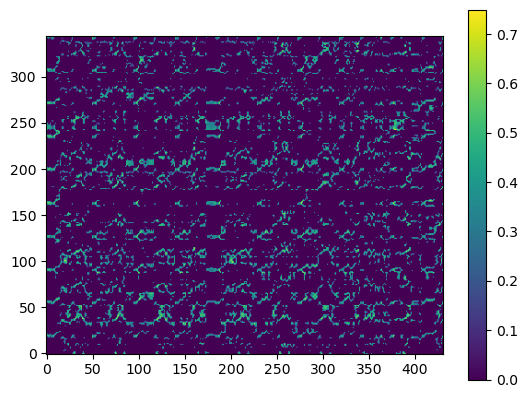

In [23]:
cross_sim = librosa.segment.cross_similarity(mfcc_matrix_disco_second, mfcc_matrix_disco_third, mode='affinity')
cross_sim.shape

cmap = 'viridis'
plt.imshow(cross_sim, cmap=cmap, origin='lower')
plt.colorbar()
plt.show()

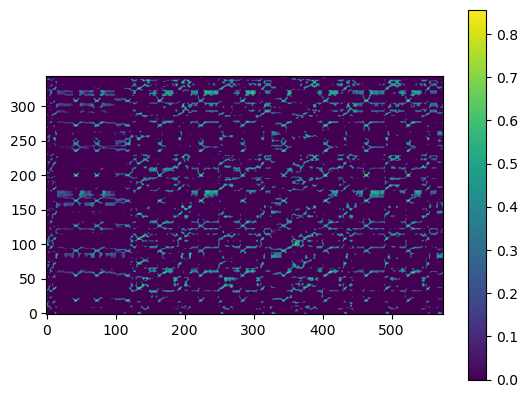

In [24]:
cross_sim = librosa.segment.cross_similarity(mfcc_matrix_disco_first, mfcc_matrix_disco_third, mode='affinity')
cross_sim.shape

cmap = 'viridis'
plt.imshow(cross_sim, cmap=cmap, origin='lower')
plt.colorbar()
plt.show()

The time stretching is observed in the plots, as there are lots of sections of similarity, but they are spread out along the whole plot, rather than mostly falling along the linear diagonal like in the self-similarity plot. Furthermore, these are not symmetric around the diagonal as a self-similarity plot is. If the audio embeddings were dissimilar then you would have a plot without all of the high similarity (light blue) sections, but since they are similar there is lots of similar sections.

#### **Question A6.4 (expected):** 

Use [harmonic/percussive sound source separation](https://librosa.org/librosa_gallery/auto_examples/plot_hprss.html) to generate a percussive track and a harmonic track from your 30 second example. Plot the self-similarity matrices using affinity for the percussive and harmonic versions using MFCCs as well as Chroma (use chroma_cqt or chroma_stft). Based on the resulting four plots discuss feature set works better for each configuration (harmonic/percussive).

**(Expected: 2 points)** 

C:\Users\godpi\AppData\Local\Temp\ipykernel_3796\1108522346.py:11: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  librosa.display.specshow(librosa.amplitude_to_db(D, ref=rp), y_axis='log')
C:\Users\godpi\AppData\Local\Temp\ipykernel_3796\1108522346.py:16: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  librosa.display.specshow(librosa.amplitude_to_db(D_harmonic, ref=rp), y_axis='log')
C:\Users\godpi\AppData\Local\Temp\ipykernel_3796\1108522346.py:21: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  librosa.display.specshow(librosa.amplitude_to_db(D_percussive, ref=rp), y_axis='log', x_axis='time')


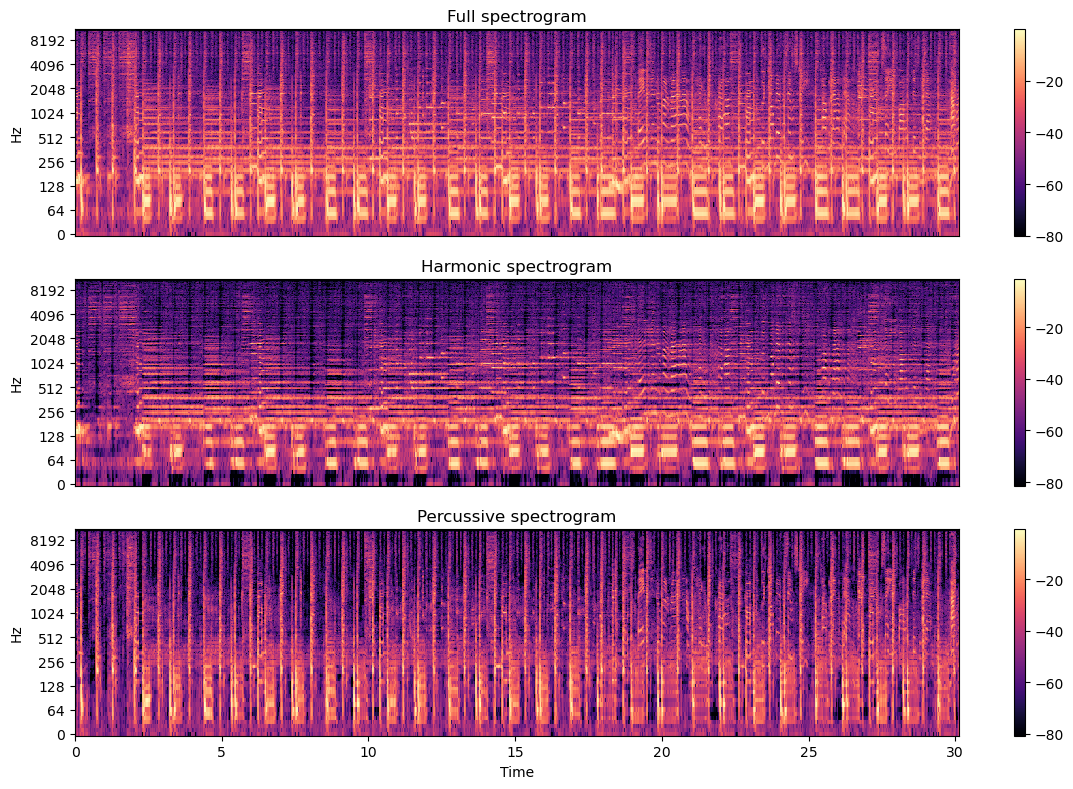

In [26]:
# your code goes here 
D = librosa.stft(disco30)

D_harmonic, D_percussive = librosa.decompose.hpss(D)

rp = np.max(np.abs(D))

plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(D, ref=rp), y_axis='log')
plt.colorbar()
plt.title('Full spectrogram')

plt.subplot(3, 1, 2)
librosa.display.specshow(librosa.amplitude_to_db(D_harmonic, ref=rp), y_axis='log')
plt.colorbar()
plt.title('Harmonic spectrogram')

plt.subplot(3, 1, 3)
librosa.display.specshow(librosa.amplitude_to_db(D_percussive, ref=rp), y_axis='log', x_axis='time')
plt.colorbar()
plt.title('Percussive spectrogram')
plt.tight_layout()

In [31]:
print(D_harmonic.shape)
print(D_percussive.shape)

(1025, 1298)
(1025, 1298)


In [36]:
mfcc_matrix_disco30_harmonic = librosa.feature.mfcc(S=librosa.amplitude_to_db(np.abs(D_harmonic)), sr=srate)
print(mfcc_matrix_disco30_harmonic.shape)

mfcc_matrix_disco30_percussive = librosa.feature.mfcc(S=librosa.amplitude_to_db(np.abs(D_percussive)), sr=srate)
print(mfcc_matrix_disco30_percussive.shape)

chroma_matrix_disco30_harmonic = librosa.feature.chroma_stft(S=librosa.amplitude_to_db(np.abs(D_harmonic)), sr=srate)
print(chroma_matrix_disco30_harmonic.shape)

chroma_matrix_disco30_percussive = librosa.feature.chroma_stft(S=librosa.amplitude_to_db(np.abs(D_percussive)), sr=srate)
print(chroma_matrix_disco30_percussive.shape)

(20, 1298)
(20, 1298)
(12, 1298)
(12, 1298)


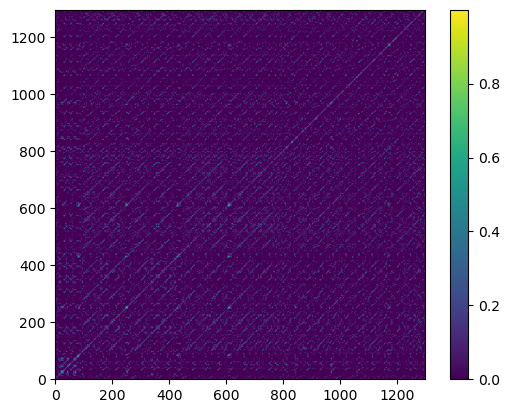

In [38]:
cross_sim = librosa.segment.cross_similarity(mfcc_matrix_disco30_percussive, mfcc_matrix_disco30_percussive, mode='affinity')
cross_sim.shape

cmap = 'viridis'
plt.imshow(cross_sim, cmap=cmap, origin='lower')
plt.colorbar()
plt.show()

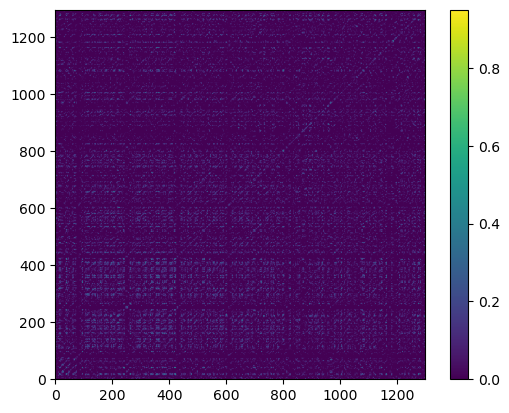

In [39]:
cross_sim = librosa.segment.cross_similarity(chroma_matrix_disco30_percussive, chroma_matrix_disco30_percussive, mode='affinity')
cross_sim.shape

cmap = 'viridis'
plt.imshow(cross_sim, cmap=cmap, origin='lower')
plt.colorbar()
plt.show()

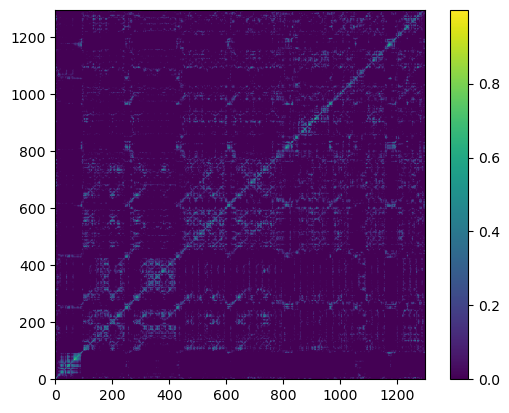

In [37]:
cross_sim = librosa.segment.cross_similarity(mfcc_matrix_disco30_harmonic, mfcc_matrix_disco30_harmonic, mode='affinity')
cross_sim.shape

cmap = 'viridis'
plt.imshow(cross_sim, cmap=cmap, origin='lower')
plt.colorbar()
plt.show()

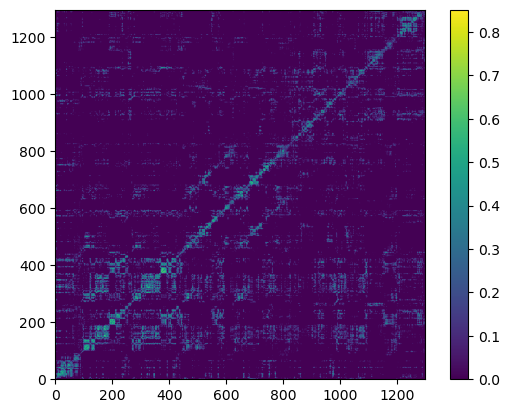

In [40]:
cross_sim = librosa.segment.cross_similarity(chroma_matrix_disco30_harmonic, chroma_matrix_disco30_harmonic, mode='affinity')
cross_sim.shape

cmap = 'viridis'
plt.imshow(cross_sim, cmap=cmap, origin='lower')
plt.colorbar()
plt.show()

For the percussive track, MFCC has a stronger diagonal, and the off-diagonal similarities are also distinct lines, whereas the chroma plot does not have many off-diagonal lines, instead being covered in small squares. While the squares do imply similarity, the lines of the MFCC plot are easier to trace back into the tracks and find the similar sections of audio, making the MFCC percussive track more useful.
  
As for the harmonic track, both have strong diagonals, but the MFCC plot has marginally more off-diagonal similarities. While the off-diagonal similarities in the crhoma plot are stronger, there are less of them, and they aren't weak in the MFCC plot to the point of being undetectable, making the MFCC plot more useful since there are more similarities.

**Question A5.5 (advanced):** 

Use Dynamic Time Warping using the original and modified (time-stretched) recording you created in the question A6.3. Plot the cost matrix and associated optimal path and describe how the optimal path reflects the time stretching. Show how you can estimate the time-stretching rates from the optimal path. You can assume that you know that the rate is going to change every 10 seconds but you don’t know what the corresponding rates are. Test your procedure with a set of different time stretching rates.


**(Advanced: 2 points)**

In [4]:
# your code goes here 